In [4]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
image_w = 128
image_h = 128

X = []
y = []

In [5]:
for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.JPG")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
xy = (X_train, X_test, X_val, y_train, y_test, y_val)
np.save("C:/Users/ICT01_20/Desktop/food-10", xy)

print("ok", len(y))

갈치구이  파일 길이 :  700
갈치구이  :  C:/Users/ICT01_20/Desktop/food-5/갈치구이\Img_001_0000.jpg
계란찜  파일 길이 :  784
계란찜  :  C:/Users/ICT01_20/Desktop/food-5/계란찜\Img_125_0000.jpg
계란찜  :  C:/Users/ICT01_20/Desktop/food-5/계란찜\Img_125_0871.jpg
고사리나물  파일 길이 :  896
고사리나물  :  C:/Users/ICT01_20/Desktop/food-5/고사리나물\Img_041_0000.JPG
고사리나물  :  C:/Users/ICT01_20/Desktop/food-5/고사리나물\Img_041_0782.jpg
메추리알장조림  파일 길이 :  719
메추리알장조림  :  C:/Users/ICT01_20/Desktop/food-5/메추리알장조림\Img_112_0001.jpg
메추리알장조림  :  C:/Users/ICT01_20/Desktop/food-5/메추리알장조림\Img_112_0973.jpg
소세지볶음  파일 길이 :  0
애호박볶음  파일 길이 :  725
애호박볶음  :  C:/Users/ICT01_20/Desktop/food-5/애호박볶음\Img_045_0000.jpg
애호박볶음  :  C:/Users/ICT01_20/Desktop/food-5/애호박볶음\Img_045_0965.jpg
연근조림  파일 길이 :  671
연근조림  :  C:/Users/ICT01_20/Desktop/food-5/연근조림\Img_113_0000.JPG
오징어채볶음  파일 길이 :  704
오징어채볶음  :  C:/Users/ICT01_20/Desktop/food-5/오징어채볶음\Img_087_0003.jpg
오징어채볶음  :  C:/Users/ICT01_20/Desktop/food-5/오징어채볶음\Img_087_1070.jpg
제육볶음  파일 길이 :  815
제육볶음  :  C:/Users/ICT01_20/Deskt

In [2]:
import os, glob, numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
#np_load_old = np.load
#np.load = lambda *a, **k : np_load_old(*a, allow_pickle=True, **k)
#np.load = np_load_old

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, X_val, y_train, y_test, y_val= np.load('C:/Users/ICT01_20/Desktop/food-5-2.npy',allow_pickle=True)
# C:/Users/ICT01_20/Desktop/food-5-2.npy
# C:/Users/ICT01_20/Documents/study/test/food128-1.npy
print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.


(2353, 128, 128, 3)
2353


In [2]:
from keras.layers import BatchNormalization, Dropout , Activation
def deep_cnn_advanced():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 3, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 3, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 3, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 3, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 3, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 3, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(20, activation = 'softmax', kernel_initializer='he_normal'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model
model = deep_cnn_advanced()
model.summary()











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


NameError: name 'optimizers' is not defined

In [11]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [3]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_test.astype(float) / 255

In [4]:
######## ------------vgg net  사용 
from keras import models, layers
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()









_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__

In [10]:
additional_model = models.Sequential()
additional_model.add(pre_trained_vgg)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(4096, activation='relu'))
additional_model.add(layers.Dense(2048, activation='relu'))
additional_model.add(layers.Dense(1024, activation='relu'))
additional_model.add(layers.Dense(5, activation='softmax'))
 

In [7]:
additional_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 20)                20500     
Total params: 58,782,548
Trainable params: 44,067,860
Non-trainable params: 14,714,688
_______________________________________________________

In [13]:
checkpoint = ModelCheckpoint(filepath='pretrained_VGG_weight.hdf5-1', 
            monitor='loss', 
            mode='min', 
            save_best_only=True)
 
additional_model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [12]:
checkpoint = ModelCheckpoint(filepath='a', 
            monitor='loss', 
            mode='min', 
            save_best_only=True)

In [ ]:
history =  additional_model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2353 samples, validate on 785 samples
Epoch 1/20


In [4]:
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food256.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [11]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9485646088466691590,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1414495846
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2701965600564663145
 physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [25]:
from keras.layers import BatchNormalization ,Activation
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu')) 
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food256.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [27]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
activation_55 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_56 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 63, 63, 64)      

In [30]:
history = model.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

ValueError: Error when checking target: expected dense_39 to have shape (20,) but got array with shape (5,)

In [11]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

NameError: name 'model' is not defined

In [12]:
print("정확도 : %.4f" % (additional_model.evaluate(X_test, y_test)[1]))

4028/4028 [==============================] - 16s 4ms/step
정확도 : 0.6060


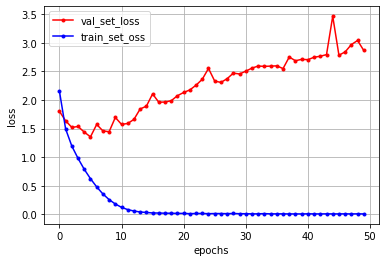

In [13]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [2]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )

image_w = 128
image_h = 128

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('./pretrained_VGG_weight.hdf5')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print("해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")
  

Using TensorFlow backend.













Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




C:\Users\ICT01_20\Anaconda3\envs\a\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
7


IndexError: list index out of range

In [6]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model


X = X_test
model = load_model('./pretrained_VGG_weight.hdf5')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print("해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")
  

Using TensorFlow backend.
C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_20\Anaconda3\envs\keras

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node vgg16/block1_conv1/convolution}}]]